## Development notebook  FCN model 

Evaluate returned heatmap values from FCN, by passing data through MRCNN and then through FCN

In [ ]:
# np_format = {}
# float_formatter = lambda x: "%10.4f" % x
# int_formatter   = lambda x: "%10d" % x
# np_format['float'] = float_formatter
# np_format['int']   = int_formatter
# np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os, sys, math, io, time, gc, argparse, platform, pprint
import numpy as np
import tensorflow as tf
import keras
import keras.backend as KB
sys.path.append('../')
import mrcnn.visualize    as visualize
import mrcnn.utils        as utils

from datetime            import datetime   
from mrcnn.config        import Config
from mrcnn.dataset       import Dataset 
from mrcnn.prep_notebook import mrcnn_newshape_train, build_fcn_training_pipeline_newshapes
from mrcnn.newshapes     import prep_newshape_dataset
from mrcnn.datagen       import data_gen_simulate

pp = pprint.PrettyPrinter(indent=2, width=100)
np.set_printoptions(linewidth=100,precision=4,threshold=1000, suppress = True)

Using TensorFlow backend.


In [2]:
##------------------------------------------------------------------------------------
## Parse command line arguments
##------------------------------------------------------------------------------------
input_parms = " --epochs          2 "
input_parms +=" --steps_in_epoch 10 " 
input_parms +=" --val_steps       2 " 
input_parms +=" --last_epoch      0 "
input_parms +=" --batch_size      1 "
input_parms +=" --lr         0.0001 "
input_parms +=" --mrcnn_logs_dir train_mrcnn_newshapes "
# input_parms +=" --fcn_logs_dir   train_fcn32_newshapes "
input_parms +="--fcn_logs_dir   train_fcn8_l2_newshapes "
input_parms +=" --scale_factor     1 " 
input_parms +=" --mrcnn_model    last "
input_parms +=" --fcn_model      init "
input_parms +=" --opt            adam "
input_parms +=" --fcn_layers     block2+ "
input_parms +=" --fcn_arch       fcn8L2 "  
input_parms +=" --sysout         screen "
input_parms +=" --new_log_folder   "        

parser = utils.command_line_parser()
args = parser.parse_args(input_parms.split())
# utils.display_input_parms(args)

NameError: name 'utils' is not defined

In [3]:
mrcnn_model, fcn_model = build_fcn_training_pipeline_newshapes(args = args, verbose = 1)


   Arguments passed :
   --------------------
   batch_size                     1
   coco_classes                   None
   epochs                         2
   fcn_arch                       FCN8L2
   fcn_layers                     ['block2+']
   fcn_logs_dir                   train_fcn8_l2_newshapes
   fcn_losses                     fcn_BCE_loss
   fcn_model                      init
   last_epoch                     0
   lr                             0.0000001
   mrcnn_exclude_layers           None
   mrcnn_layers                   ['mrcnn', 'fpn', 'rpn']
   mrcnn_logs_dir                 train_mrcnn_newshapes
   mrcnn_model                    last
   new_log_folder                 True
   opt                            ADAM
   scale_factor                   1
   steps_in_epoch                 10
   sysout                         SCREEN
   val_steps                      2


>>> Initialize Paths
 windows  Windows
>>> Initialize ModelBase model 
   Mode      :  trainfcn
   Model dir 

   FCN Block 12 shape is               :  (None, 128, 128, 64)
   FCN Block 13 (Max pooling) shape is :  (None, 64, 64, 64)
   FCN Block 21 shape is               :  (?, 64, 64, 128)
   FCN Block 22 shape is               :  (None, 64, 64, 128)
   FCN Block 23 (Max pooling) shape is :  (None, 32, 32, 128)
   FCN Block 31 shape is               :  (None, 32, 32, 256)
   FCN Block 32 shape is               :  (None, 32, 32, 256)
   FCN Block 33 shape is               :  (None, 32, 32, 256)
   FCN Block 34 (Max pooling) shape is :  (?, 16, 16, 256)
   FCN Block 41 shape is               :  (None, 16, 16, 512)
   FCN Block 42 shape is               :  (None, 16, 16, 512)
   FCN Block 43 shape is               :  (None, 16, 16, 512)
   FCN Block 44 (Max pooling) shape is :  (?, 8, 8, 512)
   FCN Block 51 shape is               :  (None, 8, 8, 512)
   FCN Block 52 shape is               :  (None, 8, 8, 512)
   FCN Block 53 shape is               :  (None, 8, 8, 512)
   FCN Block 54 (Max pool

    alt_scores_2                   :  shape: (?, 3)                KB.shape:(None, 3)             Keras Tensor: False
    alt_scores_2(scattered)        :  shape: (1, 7, 32, 3)         KB.shape:(1, 7, 32, 3)         Keras Tensor: False
    alt_scores_2_norm(by_class)    :  shape: (1, 7, 32, 3)         KB.shape:(1, 7, 32, 3)         Keras Tensor: False
    alt_scores_2_norm(by_image)    :  shape: (?, 3)                KB.shape:(None, 3)             Keras Tensor: False
    fcn_scores_dense               :  shape: (?, 23)               KB.shape:(None, 23)            Keras Tensor: False
    seq_ids                        :  shape: (?,)                  KB.shape:(None,)               Keras Tensor: False
    sscatter_ids                   :  shape: (?, 2)                KB.shape:(None, 2)             Keras Tensor: False
    fcn_scores_by_class            :  shape: (1, 7, 32, 23)        KB.shape:(1, 7, 32, 23)        Keras Tensor: False
    complete                       
    * gt_hm_scores s

DIR_PRETRAINED                 F:\PretrainedModels
DIR_TRAINING                   F:\models_newshapes
EARLY_STOP_MIN_DELTA           1e-07
EARLY_STOP_PATIENCE            1000
EPOCHS_TO_RUN                  2
FCN_INPUT_SHAPE                [128 128]
GPU_COUNT                      1
HEATMAP_SCALE_FACTOR           1
IMAGES_PER_GPU                 1
IMAGE_BUFFER                   20
IMAGE_MAX_DIM                  128
IMAGE_MIN_DIM                  128
IMAGE_PADDING                  True
IMAGE_SHAPE                    [128 128   3]
LAST_EPOCH_RAN                 0
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  1e-07
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTANCES               100
MAX_SHAPES_PER_IMAGE           15
MEAN_PIXEL                     [123.7 116.8 103.9]
MINI_MASK_SHAPE                (56, 56)
MIN_LR                         1e-10
MIN_SHAPES_PER_IMAGE           1
NAME                           fcn
NEW_LOG_FOLDER         

#### load model weights

In [ ]:
##------------------------------------------------------------------------------------
## Load MRCNN Model weights  
##------------------------------------------------------------------------------------
# exclude=["mrcnn_class_logits"] # ,"mrcnn_bbox_fc"]   #, "mrcnn_bbox", "mrcnn_mask"])
# mrcnn_model.load_model_weights(init_with = 'last', exclude = None)  

##------------------------------------------------------------------------------------
## Load FCN Model weights  
##------------------------------------------------------------------------------------
# WEIGHTS_PATH = '/home/kbardool/models/train_fcn8_coco/fcn20181031T0000/fcn_0106.h5'
# fcn_model.load_model_weights(init_with = WEIGHTS_PATH) # 'fcn_config.VGG16_MODEL_PATH')

#### display fcn_config

In [ ]:
# mrcnn_model.config.EPOCHS_TO_RUN = 1
fcn_model.config.display()  
# mrcnn_model.layer_info()

In [ ]:
fcn_model.keras_model.summary()
fcn_model.layer_info()
# fcn_model.config.display()

In [ ]:
# del fcn_m
ff = fcn_model.keras_model
# pp.pprint(dir(ff))
# for i in ff.layers:
#     print(i.name)
ly = ff.layers[35]
dir(ly)
print(ly.input, ly.input_shape)
print(ly.output, ly.output_shape)
# test = [None] *len(fcn_m.targets)

print('ff.outputNames', ff.output_names)
print('ff.outputShapes', ff.output_shape)

print('ff.targets :', len(ff.targets))
for tensor in ff.targets:
      print('  ', tensor)
print('ff.inputs  :', len(ff.inputs))
for tensor in ff.inputs:
      print('   ', tensor)
print('fd.sample_weights :', ff.sample_weights)
print('ff.input          :', len(ff.input))
print('_feed_input_nmes: ', ff._feed_input_names)
print('_feed_output_nmes: ', ff._feed_output_names)

## Load datasets

In [4]:
##------------------------------------------------------------------------------------
## Build & Load Training and Validation datasets
##------------------------------------------------------------------------------------
dataset_train, train_generator = prep_newshape_dataset( mrcnn_model.config, 5000, generator=True)
dataset_val  , val_generator   = prep_newshape_dataset( mrcnn_model.config,  1250, generator=True)
class_names = dataset_train.class_names
print(len(dataset_train.image_ids), len(dataset_val.image_ids))

Prepares complete
Prepares complete
5000 1250


In [ ]:
# dataset_train.display_active_classes()
# dataset_val.display_active_classes()
print(len(dataset_train.image_ids), len(dataset_val.image_ids))
ext_ids = [img_inf['id'] for img_inf in dataset_train.image_info]
print(len(ext_ids))
ext_ids.index(999)

## Display Images

###  Display image with Ground Truth bounding boxes and masks

image id :  332
 Image_id    :  332  Reference:  [('sun', (39, 91, 237), (38, 12, 5, 5)), ('cloud', (90, 85, 154), (31, 26, 27, 9)), ('cloud', (206, 106, 133), (97, 27, 29, 5)), ('building', (194, 168, 234), (24, 42, 10, 10)), ('building', (111, 71, 0), (51, 54, 12, 15)), ('building', (4, 103, 136), (77, 64, 15, 20)), ('person', (123, 127, 112), (24, 72, 2, 11)), ('tree', (35, 84, 155), (63, 77, 16, 16)), ('building', (102, 101, 203), (93, 79, 18, 27)), ('person', (213, 43, 122), (70, 80, 2, 13)), ('tree', (105, 205, 112), (31, 94, 20, 20)), ('person', (255, 142, 252), (101, 103, 3, 19))] Coco Id: 332
 Image meta  :  [332 128 128   3   0   0 128 128]
 Class ids   :  (12,)    [3 6 6 4 4 4 1 5 4 1 5 1]
 Class Names :  ['sun', 'cloud', 'cloud', 'building', 'building', 'building', 'person', 'tree', 'building', 'person', 'tree', 'person']


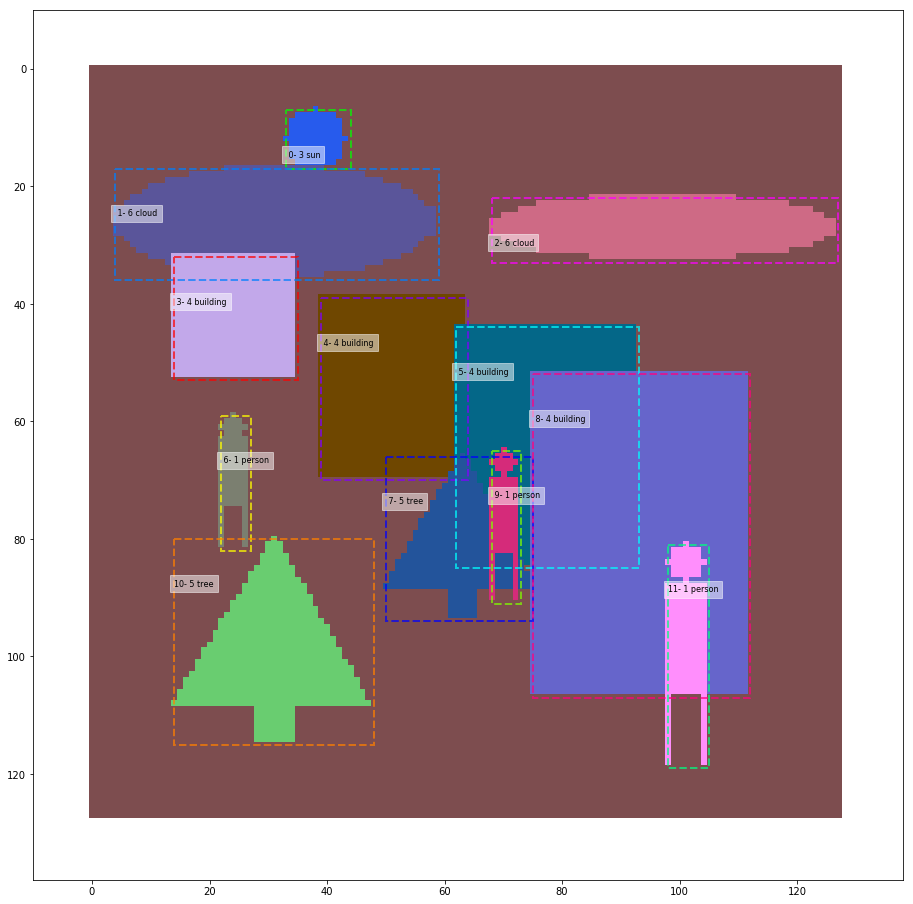

[332 128 128   3   0   0 128 128   1   1   1   1   1   1   1]


In [88]:
IMAGE_IDS = [332]
# train_batch_x, train_batch_y = next(train_generator)
batch_x, batch_y = data_gen_simulate(dataset_train, mrcnn_model.config, IMAGE_IDS)
visualize.display_training_batch(dataset_train, batch_x)
print(batch_x[1][0])

### other image displays

####  Display Training / Validation Training set information

In [ ]:
print("Train Dataset Image Count: {}".format(len(dataset_train.image_ids)))
print("Training Dataset Class Count: {}".format(dataset_train.num_classes))
for i, info in enumerate(dataset_train.class_info):
    print("{:3}. {:50}".format(i, info['name']))
    
    
print("Validation Dataset Image Count: {}".format(len(dataset_val.image_ids)))
print("Validation Dataset Class Count: {}".format(dataset_val.num_classes))
for i, info in enumerate(dataset_val.class_info):
    print("{:3}. {:50}".format(i, info['name']))    

#### Display top masks for a random group of images

In [ ]:
# Load and display random samples
image_ids = np.random.choice(dataset_train.image_ids, 7)
for image_id in image_ids:
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

#### Display a random image with instances and mask

In [ ]:
# Load random image and mask.
# image_id = np.random.choice(dataset_train.image_ids)


image    = dataset_train.load_image(image_id)
mask, class_ids = dataset_train.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset_train.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
print(class_ids.shape[0], bbox.shape[0])
# Display image and instances
visualize.display_instances_with_mask(image, bbox, mask, class_ids, dataset_train.class_names)

## FCN `train_in_batches()`

#### setup datasets

 #### Display parameters

In [6]:
from mrcnn.utils        import log
# fcn_config.EPOCHS_TO_RUN  = 4
# fcn_config.LEARNING_RATE  = 0.1
fcn_model.config.VALIDATION_STEPS = 4
# fcn_model.config.display()
print('--- MRCNN-------------------------------------------------------')
log("Epochs to run       {} ".format(mrcnn_model.config.EPOCHS_TO_RUN))
log("Steps per epochs    {} ".format(mrcnn_model.config.STEPS_PER_EPOCH))
log("Batch size          {} ".format(mrcnn_model.config.BATCH_SIZE))
log("Learning Rate       {} ".format(mrcnn_model.config.LEARNING_RATE))
log("Momentum            {} ".format(mrcnn_model.config.LEARNING_MOMENTUM))
log("Weight Decay:       {} ".format(mrcnn_model.config.WEIGHT_DECAY       ))
log("VALIDATION_STEPS    {} ".format(mrcnn_model.config.VALIDATION_STEPS   ))
# log("Checkpoint Path:    {} ".format(mrcnn_model.checkpoint_path))
# log("REDUCE_LR_FACTOR    {} ".format(mrcnn_model.config.REDUCE_LR_FACTOR   ))
# log("REDUCE_LR_COOLDOWN  {} ".format(mrcnn_model.config.REDUCE_LR_COOLDOWN ))
# log("REDUCE_LR_PATIENCE  {} ".format(mrcnn_model.config.REDUCE_LR_PATIENCE ))
# log("MIN_LR              {} ".format(mrcnn_model.config.MIN_LR             ))
# log("EARLY_STOP_PATIENCE {} ".format(mrcnn_model.config.EARLY_STOP_PATIENCE))     

print('--- FCN --------------------------------------------------------')
log("Epochs to run       {} ".format(fcn_model.config.EPOCHS_TO_RUN))
log("Steps per epochs    {} ".format(fcn_model.config.STEPS_PER_EPOCH))
log("Batch size          {} ".format(fcn_model.config.BATCH_SIZE))
log("Learning Rate       {} ".format(fcn_model.config.LEARNING_RATE))
log("Momentum            {} ".format(fcn_model.config.LEARNING_MOMENTUM))
log("Weight Decay:       {} ".format(fcn_model.config.WEIGHT_DECAY       ))
log("VALIDATION_STEPS    {} ".format(fcn_model.config.VALIDATION_STEPS   ))
log("Checkpoint Path:    {} ".format(fcn_model.checkpoint_path))
log("REDUCE_LR_FACTOR    {} ".format(fcn_model.config.REDUCE_LR_FACTOR   ))
log("REDUCE_LR_COOLDOWN  {} ".format(fcn_model.config.REDUCE_LR_COOLDOWN ))
log("REDUCE_LR_PATIENCE  {} ".format(fcn_model.config.REDUCE_LR_PATIENCE ))
log("MIN_LR              {} ".format(fcn_model.config.MIN_LR             ))
log("EARLY_STOP_PATIENCE {} ".format(fcn_model.config.EARLY_STOP_PATIENCE)) 
log("HEATMAP SCALE FACOR {} ".format(fcn_model.config.HEATMAP_SCALE_FACTOR)) 
log("FCN_INPUT_SHAPE     {} ".format(fcn_model.config.FCN_INPUT_SHAPE)) 

--- MRCNN-------------------------------------------------------
Epochs to run       2 
Steps per epochs    10 
Batch size          1 
Learning Rate       1e-07 
Momentum            0.9 
Weight Decay:       0.0001 
VALIDATION_STEPS    2 
--- FCN --------------------------------------------------------
Epochs to run       2 
Steps per epochs    10 
Batch size          1 
Learning Rate       1e-07 
Momentum            0.9 
Weight Decay:       1e-06 
VALIDATION_STEPS    4 
Checkpoint Path:    F:\models_newshapes\train_fcn8_l2_newshapes\fcn20181224T1542\fcn_{epoch:04d}.h5 
REDUCE_LR_FACTOR    0.5 
REDUCE_LR_COOLDOWN  50 
REDUCE_LR_PATIENCE  500 
MIN_LR              1e-10 
EARLY_STOP_PATIENCE 1000 
HEATMAP SCALE FACOR 1 
FCN_INPUT_SHAPE     [128 128] 


## Simulate Train in Batches - step by step

#### Prepare model (compile / callbacks)

In [7]:
# def train_in_batches(self,
#                 mrcnn_model,
#               train_dataset, 
#               val_dataset,  
#               layers            = None,
#               losses            = None,
train_layers      = ['block2+']
loss_names        = ["fcn_BCE_loss"]
# train_in_batches(fcn_model,
#             mrcnn_model,    
#             dataset_train,
#             dataset_val, 
#             layers = train_layers,
#             losses = loss_names
#             )
fcn_model.epoch   = fcn_model.config.LAST_EPOCH_RAN = 0
self              = fcn_model
mrcnn_model       = mrcnn_model
train_dataset     = dataset_train
val_dataset       = dataset_val
layers            = train_layers
losses            = loss_names
learning_rate     = 0           
epochs            = 0
epochs_to_run     = 0 
batch_size        = 0 
steps_per_epoch   = 0
min_LR            = 0
debug             = False

'''
Train the model.
train_dataset, 
val_dataset:    Training and validation Dataset objects.

learning_rate:  The learning rate to train with

epochs:         Number of training epochs. Note that previous training epochs
                are considered to be done already, so this actually determines
                the epochs to train in total rather than in this particaular
                call.

layers:         Allows selecting wich layers to train. It can be:
                - A regular expression to match layer names to train
                - One of these predefined values:
                heads: The RPN, classifier and mask heads of the network
                all: All the layers
                3+: Train Resnet stage 3 and up
                4+: Train Resnet stage 4 and up
                5+: Train Resnet stage 5 and up
'''
assert self.mode == "training", "Create model in training mode."

if batch_size == 0 :
    batch_size = self.config.BATCH_SIZE

if epochs_to_run ==  0 :
    epochs_to_run = self.config.EPOCHS_TO_RUN

if steps_per_epoch == 0:
    steps_per_epoch = self.config.STEPS_PER_EPOCH

if min_LR == 0 :
    min_LR = self.config.MIN_LR

if learning_rate == 0:
    learning_rate = self.config.LEARNING_RATE

epochs = self.epoch + epochs_to_run

# use Pre-defined layer regular expressions
# if layers in self.layer_regex.keys():
    # layers = self.layer_regex[layers]
print(layers)
# train_regex_list = []
# for x in layers:
    # print( ' layers ias : ',x)
    # train_regex_list.append(x)
train_regex_list = [self.layer_regex[x] for x in layers]
print(train_regex_list)
layers = '|'.join(train_regex_list)        
print('layers regex :', layers)


##--------------------------------------------------------------------------------
## Data generators
##--------------------------------------------------------------------------------
# train_generator = data_generator(train_dataset, mrcnn_model.config, shuffle=True,
#                                  batch_size=batch_size)
# val_generator   = data_generator(val_dataset, mrcnn_model.config, shuffle=True,
#                                  batch_size=batch_size,
#                                  augment=False)

##--------------------------------------------------------------------------------
## Set trainable layers and compile
##--------------------------------------------------------------------------------
self.set_trainable(layers)            

##----------------------------------------------------------------------------------------------
## Setup optimizaion method 
##----------------------------------------------------------------------------------------------            
optimizer = self.set_optimizer()

# self.compile(learning_rate, self.config.LEARNING_MOMENTUM, losses)        
self.compile(losses, optimizer)

##--------------------------------------------------------------------------------
## get metrics from keras_model.metrics_names and setup callback metrics 
##--------------------------------------------------------------------------------
out_labels = self.get_deduped_metrics_names()
callback_metrics = out_labels + ['val_' + n for n in out_labels]

print()
print(' Post-compile out_labels from get_deduped_metrics_names() : ')
print(' ---------------------------------------------------------- ')
for i in out_labels:
    print('     -',i)
print()
print(' Post-compile Callback metrics monitored by progbar :')
print(' ----------------------------------------------------')
for i in callback_metrics:
    print('     -',i)

print()
print(' Post-compile Keras metric_names :') 
print(' ---------------------------------') 
for idx, i in enumerate(self.keras_model.metrics_names):
    print('     ',idx, '  ', i)

print()
print(' Post-compile Keras stateful_metric_names :') 
print(' ------------------------------------------') 
for idx, i in enumerate(self.keras_model.stateful_metric_names):
    print('     ',idx, '  ', i)
print(' ------------------------------------------') 

## Setup for stateful_metric_indices Validation process 
##--------------------------------------------------------------------------------
stateful_metric_indices = []
if hasattr(self, 'metrics'):
    for m in self.stateful_metric_functions:
        m.reset_states()
    stateful_metric_indices = [
        i for i, name in enumerate(self.metrics_names)
        if str(name) in self.stateful_metric_names]
else:
    stateful_metric_indices = []

##--------------------------------------------------------------------------------
## Callbacks
##--------------------------------------------------------------------------------
# call back for model checkpoint was originally (?) loss. chanegd to val_loss (which is default) 2-5-18
# copied from \keras\engine\training.py
# def _get_deduped_metrics_names(self):


callbacks_list = [
      keras.callbacks.ProgbarLogger(count_mode='steps',
                                    stateful_metrics=self.keras_model.stateful_metric_names)

    , keras.callbacks.BaseLogger(stateful_metrics=self.keras_model.stateful_metric_names)

    , keras.callbacks.TensorBoard(log_dir=self.log_dir,
                                  histogram_freq=1,
                                  write_graph=True,
                                  write_images=False, 
                                  write_grads=True,
                                  batch_size=self.config.BATCH_SIZE)
                                  # write_graph=True,

                                  # write_images=True,
                                  # embeddings_freq=0,
                                  # embeddings_layer_names=None,
                                  # embeddings_metadata=None)

    , keras.callbacks.ModelCheckpoint(self.checkpoint_path, 
                                      mode    = 'auto', 
                                      period  = self.config.CHECKPOINT_PERIOD, 
                                      monitor = 'val_loss', 
                                      verbose = 1, 
                                      save_best_only = True, 
                                      save_weights_only=True)

    , keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                        mode     = 'auto', 
                                        factor   = self.config.REDUCE_LR_FACTOR,   
                                        cooldown = self.config.REDUCE_LR_COOLDOWN,
                                        patience = self.config.REDUCE_LR_PATIENCE,
                                        min_delta= self.config.REDUCE_LR_MIN_DELTA,
                                        min_lr   = self.config.MIN_LR, 
                                        verbose  = 1)                                            

    , keras.callbacks.EarlyStopping(monitor='val_loss', 
                                        mode      = 'auto', 
                                        min_delta = self.config.EARLY_STOP_MIN_DELTA, 

                                        patience  = self.config.EARLY_STOP_PATIENCE, 
                                        verbose   = 1)                                            
    , keras.callbacks.History() 
]


callbacks =  keras.callbacks.CallbackList(callbacks = callbacks_list)
callbacks.set_model(self.keras_model)
callbacks.set_params({
    'batch_size': batch_size,
    'epochs': epochs,
    'steps': steps_per_epoch,
    'verbose': 1 ,
    'do_validation': True,
    'metrics': callback_metrics
})

    # 'samples': num_train_samples,
    # 'verbose': verbose,
    # 'do_validation': do_validation,
    # 'metrics': callback_metrics or [],

log(" ")
log("Training Start Parameters:")
log("--------------------------")
log("Starting at epoch     {} of {} epochs.".format(self.epoch, epochs))
log("Steps per epochs      {} ".format(steps_per_epoch))
log("Last epoch completed  {} ".format(self.epoch))
log("Batch size            {} ".format(batch_size))
log("Learning Rate         {} ".format(self.config.LEARNING_RATE))
log("Momentum              {} ".format(self.config.LEARNING_MOMENTUM))
log("Weight Decay:         {} ".format(self.config.WEIGHT_DECAY       ))
log("VALIDATION_STEPS      {} ".format(self.config.VALIDATION_STEPS   ))
log("REDUCE_LR_FACTOR      {} ".format(self.config.REDUCE_LR_FACTOR   ))
log("REDUCE_LR_COOLDOWN    {} ".format(self.config.REDUCE_LR_COOLDOWN ))
log("REDUCE_LR_PATIENCE    {} ".format(self.config.REDUCE_LR_PATIENCE ))
log("MIN_LR                {} ".format(self.config.MIN_LR             ))
log("EARLY_STOP_PATIENCE   {} ".format(self.config.EARLY_STOP_PATIENCE))        
log("Checkpoint Path:      {} ".format(self.checkpoint_path))


##----------------------------------------------------------------------------------------------
## If in debug mode write stdout intercepted IO to output file  
##----------------------------------------------------------------------------------------------            
if self.config.SYSOUT == 'FILE':
    utils.write_sysout(self.log_dir)

##--------------------------------------------------------------------------------
## Start main training loop
##--------------------------------------------------------------------------------
early_stopping  = False
val_steps = self.config.VALIDATION_STEPS
epoch_idx = self.epoch

callbacks.on_train_begin()

['block2+']
['(block2\\_.*)|(block3\\_.*)|(block4\\_.*)|(block5\\_.*)|(fcn32\\_.*)|(fcn16\\_.*)|(fcn8\\_.*)']
layers regex : (block2\_.*)|(block3\_.*)|(block4\_.*)|(block5\_.*)|(fcn32\_.*)|(fcn16\_.*)|(fcn8\_.*)

Selecting layers to train
-------------------------
Layer    Layer Name               Layer Type
   0  input_pr_hm_norm       (InputLayer          )   ............................no weights to train ]
   1  block1_conv1           (Conv2D              )   ............................not a layer we want to train ]
   2  block1_conv2           (Conv2D              )   ............................not a layer we want to train ]
   3  block1_pool            (MaxPooling2D        )   ............................no weights to train ]
   4  block2_conv1           (Conv2D              )   TRAIN 
   5  block2_conv2           (Conv2D              )   TRAIN 
   6  block2_pool            (MaxPooling2D        )   ............................no weights to train ]
   7  block3_conv1           (

 
Training Start Parameters:
--------------------------
Starting at epoch     0 of 2 epochs.
Steps per epochs      10 
Last epoch completed  0 
Batch size            1 
Learning Rate         1e-07 
Momentum              0.9 
Weight Decay:         1e-06 
VALIDATION_STEPS      4 
REDUCE_LR_FACTOR      0.5 
REDUCE_LR_COOLDOWN    50 
REDUCE_LR_PATIENCE    500 
MIN_LR                1e-10 
EARLY_STOP_PATIENCE   1000 
Checkpoint Path:      F:\models_newshapes\train_fcn8_l2_newshapes\fcn20181224T1542\fcn_{epoch:04d}.h5 


In [ ]:
# if epoch_idx >= epochs:
#     print('Final epoch {} has already completed - Training will not proceed'.format(epochs))
# else:

#     while epoch_idx < epochs :

#### Start of epoch

In [8]:
callbacks.on_epoch_begin(epoch_idx)
epoch_logs = {}

Epoch 1/2


In [ ]:
        ##------------------------------------------------------------------------
        ## TRAINING Phase - emulating fit_generator()
        ##------------------------------------------------------------------------
#         for steps_index in range(steps_per_epoch):

In [9]:
steps_index = 0

#### Run one batch 

In [129]:
# print(' self.epoch {}   epochs {}  step {} '.format(self.epoch, epochs, steps_index))
batch_logs = {}
batch_logs['batch'] = steps_index
batch_logs['size']  = batch_size    

callbacks.on_batch_begin(steps_index, batch_logs)



# print('len of train batch x' ,len(train_batch_x))
# for idx, i in  enumerate(train_batch_x):
    # print(idx, 'type: ', type(i), 'shape: ', i.shape)
# print('len of train batch y' ,len(train_batch_y))
# for idx, i in  enumerate(train_batch_y):
    # print(idx, 'type: ', type(i), 'shape: ', i.shape)
# print(type(output_rois))
# for i in model_output:
    # print( i.shape)       

## Run prediction on MRCNN  
good_sample = False
while not good_sample:
    try:
#         train_batch_x, train_batch_y = next(train_generator)
        results = mrcnn_model.keras_model.predict(train_batch_x)
        for i in results:
            print(i.shape, type(i), np.any(np.isnan(i)))    
        if np.any(np.isnan(results[1])):
            print(' Bad train_batch_x encountered - epoch {} , image ids: {} -- Retry with next sample'.format(epoch_idx, train_batch_x[1][:,0]))
        else :
            good_sample = True
    except Exception as e :
        print('failure on mrcnn predict - epoch {} , image ids: {} '.format(epoch_idx, train_batch_x[1][:,0]))
        print('Exception information:')
        print(str(e))
else:        
    fcn_x = [train_batch_x[1]]
    fcn_x.extend(results[:4])

# print('size of results : ', len(results))
# for idx, i in  enumerate(x):
    # print(idx, 'type: ', type(i), 'shape: ', i.shape)

###-------------------------------------------------------------------------------------------------------    
print(train_batch_x[1])
for i in results:
    print(i.shape, type(i), np.any(np.isnan(i)))

(1, 128, 128, 7) <class 'numpy.ndarray'> True
(1, 7, 32, 23) <class 'numpy.ndarray'> True
(1, 128, 128, 7) <class 'numpy.ndarray'> False
(1, 7, 32, 23) <class 'numpy.ndarray'> False
(1, 32, 7) <class 'numpy.ndarray'> False
(1, 32, 7, 4) <class 'numpy.ndarray'> False
(1, 32, 4) <class 'numpy.ndarray'> False
(1, 32) <class 'numpy.ndarray'> False
(1, 32, 4) <class 'numpy.ndarray'> False
(1, 32, 7) <class 'numpy.ndarray'> False
(1, 7) <class 'numpy.ndarray'> False
(1, 2000, 4) <class 'numpy.ndarray'> False
 Bad train_batch_x encountered - epoch 1 , image ids: [       332] -- Retry with next sample
(1, 128, 128, 7) <class 'numpy.ndarray'> False
(1, 7, 32, 23) <class 'numpy.ndarray'> False
(1, 128, 128, 7) <class 'numpy.ndarray'> False
(1, 7, 32, 23) <class 'numpy.ndarray'> False
(1, 32, 7) <class 'numpy.ndarray'> False
(1, 32, 7, 4) <class 'numpy.ndarray'> False
(1, 32, 4) <class 'numpy.ndarray'> False
(1, 32) <class 'numpy.ndarray'> False
(1, 32, 4) <class 'numpy.ndarray'> False
(1, 32, 7)

In [11]:
## Train on FCN
try:
    outs = self.keras_model.train_on_batch(fcn_x , train_batch_y)                                            
except Exception as e :
    print('failure on fcn train - epoch {} , image ids: {} '.format(epoch_idx, train_batch_x[1][:,0]))
    print('Exception information:')
    print(str(e))                

# print('size of outputs from train_on_batch : ', len(outs), outs)
# for idx, i in  enumerate(outs):
    # print(idx, 'type: ', type(i), 'shape: ', i.shape)

if not isinstance(outs, list):
    outs = [outs]

for l, o in zip(out_labels, outs):
    print(' out label: ', l, ' out value: ', o,' shape: ', o.shape)
    batch_logs[l] = o

callbacks.on_batch_end(steps_index, batch_logs)
epoch_idx +=1

###------------------------------------------------------------------------------------------------------- 
print(train_batch_x[1])
for i in results:
    print(i.shape, type(i), np.any(np.isnan(i)))

 out label:  loss  out value:  [[0.0473]]  shape:  (1, 1)
 out label:  fcn_BCE_loss  out value:  [[0.0384]]  shape:  (1, 1)
 1/10 [==>...........................] - ETA: 7:37 - loss: 0.0473 - fcn_BCE_loss: 0.0384[[1810  128  128    3    0    0  128  128    1    1    1    1    1    1    1]]
(1, 128, 128, 7) <class 'numpy.ndarray'> False
(1, 7, 32, 23) <class 'numpy.ndarray'> False
(1, 128, 128, 7) <class 'numpy.ndarray'> False
(1, 7, 32, 23) <class 'numpy.ndarray'> False
(1, 32, 7) <class 'numpy.ndarray'> False
(1, 32, 7, 4) <class 'numpy.ndarray'> False
(1, 32, 4) <class 'numpy.ndarray'> False
(1, 32) <class 'numpy.ndarray'> False
(1, 32, 4) <class 'numpy.ndarray'> False
(1, 32, 7) <class 'numpy.ndarray'> False
(1, 7) <class 'numpy.ndarray'> False
(1, 2000, 4) <class 'numpy.ndarray'> False


In [ ]:
t1 = fcn_model.keras_model.optimizer.get_config()
# t2 = fcn_model.keras_model.optimizer.get_updates()
# t3 = fcn_model.keras_model.optimizer.get_gradients()
t4= fcn_model.keras_model.optimizer.get_weights()

In [16]:
np_format = {}
float_formatter = lambda x: "%8.4f" % x
int_formatter   = lambda x: "%8d" % x
np_format['float'] = float_formatter
np_format['int']   = int_formatter
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

In [89]:
print(np.any(np.isnan(fcn_x[1][0,1])))

True


In [90]:
for i in range(7):
    print()
    print(fcn_x[2][0,i,:6])
    print(fcn_x[4][0,i,:5,:15])


[[  21.695    13.107   104.0853   58.6337    0.        0.6732   30.        0.6732    1.
  3750.9568    0.6732   62.535   130.        0.481     0.5664    0.8125    0.6785       nan
   130.           nan       nan    0.8125       nan]
 [  21.4825    9.2204   62.2522  128.        0.        0.8602   22.        0.8602    1.
  4842.6147    0.8602   95.8951  160.        0.5993    0.8686    1.        0.8454       nan
   160.           nan       nan    1.           nan]
 [  42.896     0.      114.0475    8.0776    0.        0.999    21.        0.999     0.9763
   574.7332    0.9754   40.598    60.        0.6766    0.3677    0.375     0.9544       nan
    60.           nan       nan    0.375        nan]
 [  51.0232    0.      128.       32.4103    0.        0.911    20.        0.911     1.
  2494.8455    0.911    74.5089  117.        0.6368    0.6749    0.7312    0.8983       nan
   117.           nan       nan    0.7312       nan]
 [  39.255    70.2255   48.1237   93.7383    0.        0.8889  

In [ ]:
# for i in range(7):
#     print()
#     print(fcn_x[2][0,i,:6])
#     print(fcn_x[4][0,i,:5,:15])

####  Validation phase

In [ ]:
##------------------------------------------------------------------------
## VALIDATION Phase - emulating evaluate_generator()
##------------------------------------------------------------------------
# print(' Start validation ')
# print(' ---------------- ')
# print(' Stateful metric indices:' )
# pp.pprint(stateful_metric_indices)


val_steps_done      = 0
val_outs_per_batch  = []
val_batch_sizes     = []

# setup validation progress bar if we wish
# progbar = Progbar(target=val_steps)

while val_steps_done < val_steps:
    # print(' ** Validation step: ', val_steps_done)

    mrcnn_val_x, mrcnn_val_y = next(val_generator)

    # print('len of train batch x' ,len(val_x))
    # for idx, i in  enumerate(val_x):
        # print(idx, 'type: ', type(i), 'shape: ', i.shape)

    ## Run prediction on MRCNN  
    try:
        val_results = mrcnn_model.keras_model.predict(mrcnn_val_x)
        fcn_val_x = [mrcnn_val_x[1]]
        fcn_val_x.extend(val_results[:4])   ## image_meta, pr_hm, pr_hm_scores, gt_hm, gt_hm_scores
    except Exception as e :
        print('failure on mrcnn predict (validation)- epoch {} , image ids: {} '.format(epoch_idx, mrcnn_val_x[1][:,0]))
        print('Exception information:')
        print(str(e))                

    # print('    mrcnn_model.predict() size of results : ', len(val_results))
    # for idx, i in  enumerate(xval_results):
        # print('    ',idx, 'type: ', type(i), 'shape: ', i.shape)

    ## Train on FCN
    try:
        outs2 = self.keras_model.test_on_batch( fcn_val_x , mrcnn_val_y)
        # print('\n valstep {} outs2 len:{} '.format(val_steps_done, len(outs2)))
        val_outs_per_batch.append(outs2)
        print('fcn_model.test_on_batch() size of results : ', len(outs2))
        for idx, i in  enumerate(outs2):
            print(idx, 'type: ', type(i), 'shape: ', i.shape, 'val: ', i)
    except Exception as e :
        print('failure on fcn train (validation)- epoch {} , image ids: {} '.format(epoch_idx, mrcnn_val_x[1][:,0]))                    
        print('Exception information:')
        print(str(e))                



    if isinstance(fcn_val_x, list):
        batch_size = fcn_val_x[0].shape[0]
    elif isinstance(fcn_val_x, dict):
        batch_size = list(fcn_val_x.values())[0].shape[0]
    else:
        batch_size = fcn_val_x.shape[0]

    if batch_size == 0:
        raise ValueError('Received an empty batch. '
                         'Batches should at least contain one item.')
    # else:
        # print('batch size:', batch_size)

    val_steps_done += 1
    val_batch_sizes.append(batch_size)
    # print validation progress bar if we wish
    # progbar.update(val_steps_done)

## calculate val_averages after all validations steps complete, which is passed 
## back to fit_generator() as val_outs 

In [ ]:
print('    val_batch_sizes            :', type(val_batch_sizes),' len :', len(val_batch_sizes), val_batch_sizes)
print('    val_batch_sizes-shape      :', np.asarray(val_batch_sizes).shape)

print('    val_outs_per_batch:        :', type(val_outs_per_batch),' len :', len(val_outs_per_batch))
print('    val_outs_per_batch - shape :', np.asarray(val_outs_per_batch).shape)
for i,j in enumerate(val_outs_per_batch):
    print('        batch: ', i, '  ', j)

val_averages = []
for i in range(len(outs2)):
    if i not in stateful_metric_indices:
        tt = [out[i] for out in val_outs_per_batch]
        # print(' tt type: ',type(tt), tt)
        # print('val_batch_sizes.shape' , type(val_batch_sizes), len(val_batch_sizes))
        val_averages.append(
                np.average([out[i] for out in val_outs_per_batch], axis = 0, weights=val_batch_sizes)
                           )
    else:
        val_averages.append(float(val_outs_per_batch[-1][i]))
if len(val_averages) == 1:
    val_averages = val_averages[0]
print()
print('val_averages :', val_averages)
print()

####  attempt to add histogram info to tensoflow summary 

In [ ]:
#-- (unsuccessful) attempt to add histogram info to tensoflow summary  ------------------------
print(' Tensordlow histogram attempt')
print('-----------------------------')
print('model targets:', self.keras_model.targets)
print(' Total loss  :', self.keras_model.total_loss)
print(' Metric Tensors:', self.keras_model.metrics_tensors)
fcn_val_y = self.keras_model.targets
fcn_val_sample_weights = self.keras_model.sample_weights


print(' len(fcn_val_x)  : ',len(fcn_val_x))
print(' len(fcn_val_y)  : ',len(fcn_val_y))
print(' len(mrcnn_val_y): ',len(mrcnn_val_y))

# fcn_val_x, fcn_val_y, fcn_val_sample_weights = my_standardize_user_data(self.keras_model, fcn_val_x, fcn_val_y, val_sample_weight)
fcn_val_data = fcn_val_x + fcn_val_y  + fcn_val_sample_weights

print(' len(fcn_val_x)             : ',len(fcn_val_x))
print(' len(fcn_val_y)             : ',len(fcn_val_y))
print(' len(fcn_val_sample_weights): ',len(fcn_val_sample_weights))
print(' len(fcn_val_data)          : ',len(fcn_val_data))
if self.keras_model.uses_learning_phase and not isinstance(KB.learning_phase(), int):
    print(' add ')
    fcn_val_data += [0.]
for cbk in callbacks:
    cbk.validation_data = fcn_val_data

#-------------------------------------------------------------------------------

####  end of epoch (training and validation) operations 

In [ ]:
#### ------------------------------------------------------------------------
## END OF EPOCH Phase 
##------------------------------------------------------------------------
## end of evaluate_generator() emulation
## val_averages returned back to fit_generator() as val_outs
## calculate val_outs after all validations steps complete
##------------------------------------------------------------------------
if not isinstance(val_averages, list):
    val_averages = [val_averages]
# Same labels assumed.
for l, o in zip(out_labels, val_averages):
    epoch_logs['val_' + l] = o

#----commented 31-10-18 replaced with above lines -------------------------------------------
# if not isinstance(outs2, list):
    # val_outs =  np.average(np.asarray(val_all_outs), weights=val_batch_sizes)
# else:
    # averages = []
    # for i in range(len(outs2)):
        # averages.append(np.average([out[i] for out in val_all_outs], axis = 0, weights=val_batch_sizes))
    # val_outs = averages
# if not isinstance(val_outs, list):
    # val_outs = [val_outs]

# # Same labels assumed.
# for l, o in zip(out_labels, val_outs):
    # # print(' Validations : out label: val_', l, ' out value: ', o)
    # epoch_logs['val_' + l] = o
#-------------------------------------------------------------------------------------

# write_log(callback, val_names, logs, batch_no//10)
# print('\n    validation logs output: ', val_outs)


epoch_logs.update({'lr': KB.eval(self.keras_model.optimizer.lr)})    
callbacks.on_epoch_end(epoch_idx, epoch_logs)
epoch_idx += 1
                

#### Check for early stop training conditions

In [ ]:
                for callback in callbacks:
                    # print(callback)
                    # pp.pprint(dir(callback.model))
                    if hasattr(callback.model, 'stop_training') and (callback.model.stop_training ==True):
                        print(' +++++++++++ ON EPOCH END CALLBACKS TRIGGERED STOP_TRAINING +++++++++++++')
                        print(callback.model, ' triggered stop_training +++++++++++++')
                        early_stopping = True
                        
                if early_stopping:
                    print('{}  Early Stopping triggered on epoch {} of {} epochs'.format(callback, epoch_idx, epochs))
                    break    
                
            ##-------------------------------
            ## end of training operations
            ##--------------------------------
            # if epoch_idx != self.epoch:
            # chkpoint.on_epoch_end(epoch_idx -1, batch_logs)
            callbacks.on_train_end()
            self.epoch = max(epoch_idx - 1, epochs)
            print('Final : self.epoch {}   epochs {}'.format(self.epoch, epochs))
            
        ##--------------------------------------------------------------------------------
        ## End main training loop
        ##--------------------------------------------------------------------------------
        return 
        

##  Get gradients and weights

#### get_gradients()

In [ ]:
# pp.pprint(val_averages)
# print(out_labels)
# epoch_logs = {}
# print(epoch_logs)
print(self.keras_model.inputs)
print(self.keras_model.targets)
print(self.keras_model.sample_weights)
print(self.keras_model.uses_learning_phase)

In [ ]:
def get_gradients_from_model(model):
    """Return the gradient of every trainable weight in model

    Parameters
    -----------
    model : a keras model instance

    First, find all tensors which are trainable in the model. Surprisingly,
    `model.trainable_weights` will return tensors for which
    trainable=False has been set on their layer (last time I checked), hence the extra check.
    Next, get the gradients of the loss with respect to the weights.

    """
    weight_names = []
    weights = []
    for tensor in model.trainable_weights:
        ly = tensor.name.split('/')[0]
        print('Layer: ', ly, ' Tensor:', tensor.name , ' Trainable:', model.get_layer(ly).trainable)
        if model.get_layer(ly).trainable:
            weights.append(tensor)
            weight_names.append(tensor.name)
#     weights = [tensor for tensor in model.trainable_weights if model.get_layer(tensor.name[:-2]).trainable]
    optimizer = model.optimizer
    pp.pprint(optimizer.__dict__)
    return weight_names, optimizer.get_gradients(model.total_loss, weights)

def get_weights_from_model(model):
    """Return every trainable weight in model

    Parameters
    -----------
    model : a keras model instance

    First, find all tensors which are trainable in the model. Surprisingly,
    `model.trainable_weights` will return tensors for which
    trainable=False has been set on their layer (last time I checked), hence the extra check.
    

    """
    weight_names = []
    weights = []
    for tensor in model.trainable_weights:
        ly = tensor.name.split('/')[0]
        print('Layer: ', ly, ' Tensor:', tensor.name , ' Trainable:', model.get_layer(ly).trainable)
#         if model.get_layer(ly).trainable:
        weights.append(tensor)
        weight_names.append(tensor.name)
#     weights = [tensor for tensor in model.trainable_weights if model.get_layer(tensor.name[:-2]).trainable]
    return weight_names, weights

In [ ]:
import keras.backend as KB

weight_names, gradients = get_gradients_from_model(fcn_model.keras_model)
weight_names2, weights = get_weights_from_model(fcn_model.keras_model)

In [ ]:
get_gradients = KB.function(fcn_model.keras_model.inputs, outputs=gradients)

get_weights = KB.function([], outputs=weights)

In [ ]:
print(len(weights), len(weight_names2), len(t4))
# for i, j in  zip(weight_names2, weights):
#     print('name:', i, '      weights:',j)
    
# print(len(gradients), len(weight_names))
# for i, j in  zip(weight_names, gradients):
#     print('name:', i, '      gradient:',j)

In [ ]:
np_gradients = get_gradients(fcn_x)

In [ ]:
for i, j in zip(weight_names, np_gradients):
    print('{:30s}  {:25s} \t\t {:10.7f}  {:+11.9f}  {:+11.9f}  {:+11.9f}' .format(i, str(j.shape), j.min(), j.mean(), j.max(), j.std()))

In [ ]:
np_weights = get_weights([])

In [ ]:
print('{:30s}  {:25s} \t\t {:12s} {:10s} {:11s}' .format('name', 'shape', 'min()', 'max()', 'mean()'))
for i, j in zip(weight_names2, np_weights):
    print('{:30s}  {:25s} \t\t {:10.7f} {:10.7f} {:+11.9f}  {:+11.9f}' .format(i, str(j.shape), j.min(), j.max(), j.mean(), j.std()))

## Run data through MRCNN and FCN models

In [99]:
results2 = mrcnn_model.keras_model.predict(train_batch_x)
print(type(results2))
for i in results2:
#     print( i.shape)
    print(i.shape, type(i), np.any(np.isnan(i)))

<class 'list'>
(1, 128, 128, 7) <class 'numpy.ndarray'> True
(1, 7, 32, 23) <class 'numpy.ndarray'> True
(1, 128, 128, 7) <class 'numpy.ndarray'> False
(1, 7, 32, 23) <class 'numpy.ndarray'> False
(1, 32, 7) <class 'numpy.ndarray'> False
(1, 32, 7, 4) <class 'numpy.ndarray'> False
(1, 32, 4) <class 'numpy.ndarray'> False
(1, 32) <class 'numpy.ndarray'> False
(1, 32, 4) <class 'numpy.ndarray'> False
(1, 32, 7) <class 'numpy.ndarray'> False
(1, 7) <class 'numpy.ndarray'> False
(1, 2000, 4) <class 'numpy.ndarray'> False


In [123]:
# model_output 
model_output = mrcnn_model.get_layer_outputs(train_batch_x,  verbose = True, training_flag = True)
for i in model_output:
    print(i.shape, type(i), np.any(np.isnan(i)))    

/* Inputs */
Input  0:  (input_image:0                           ) 	  Input shape: (1, 128, 128, 3)
Input  1:  (input_image_meta:0                      ) 	  Input shape: (1, 15)
Input  2:  (input_rpn_match:0                       ) 	  Input shape: (1, 4092, 1)
Input  3:  (input_rpn_bbox:0                        ) 	  Input shape: (1, 256, 4)
Input  4:  (input_gt_class_ids:0                    ) 	  Input shape: (1, 100)
Input  5:  (input_gt_boxes:0                        ) 	  Input shape: (1, 100, 4)

Requested layers:
-----------------
Layer   0:  (cntxt_layer/pred_heatmap:0              ) 	  Output shape: (1, 128, 128, 7)
Layer   1:  (cntxt_layer/pred_heatmap_scores:0       ) 	  Output shape: (1, 7, 32, 23)
Layer   2:  (cntxt_layer_gt/gt_heatmap:0             ) 	  Output shape: (1, 128, 128, 7)
Layer   3:  (cntxt_layer_gt/gt_heatmap_scores:0      ) 	  Output shape: (1, 7, 32, 23)
Layer   4:  (mrcnn_class_lambda/mrcnn_class:0        ) 	  Output shape: (?, 32, 7)
Layer   5:  (mrcnn_bbox_

####  Display model input / output information

### Load input and output tensors

In [101]:
# del input_image, input_image_meta, input_gt_class_ids, input_gt_bboxes #, input_gt_bboxes_norm
input_image          =  train_batch_x[0]
input_image_meta     =  train_batch_x[1]
# input_rpn_match      =  train_batch_x[2]
# input_rpn_bbox       =  train_batch_x[3]
input_gt_class_ids   =  train_batch_x[4]
input_gt_bboxes      =  train_batch_x[5]
print(' Input image shape is    :', input_image.shape)
print(' Input image_meta        :', input_image_meta.shape)
print(' input_image_meta        :', input_image_meta[0,:10])
print(' input_gt_class_ids      :', input_gt_class_ids.shape)
print(' input_gt_bboxes         :', input_gt_bboxes.shape)

h, w = input_image.shape[1], input_image.shape[2]      #  tf.shape(input_image)[1], tf.shape(input_image)[2]
print(h,w)
input_gt_bboxes_norm = input_gt_bboxes / [h,w,h,w]
# print(' input_gt_bboxes_norm     :', input_gt_bboxes_norm.shape)

#### Load output data

print(len(model_output))
# model_rpn_class_logits          = model_output[0]          # layer:  0   shape: (1, 261888, 2)
# model_rpn_class                 = model_output[1]          # layer:  1   shape: (1, 261888, 2)
# model_rpn_bbox                  = model_output[2]          # layer:  2   shape: (1, 261888, 4)
# model_rpn_roi_proposals         = model_output[3]          # layer:  3   shape: (1, 1000, 4)

model_pred_heatmap              = model_output[0]          # layer:  0   shape: (1, 256, 256, 81)
model_pred_heatmap_scores       = model_output[1]          # layer:  1   shape: (1, 81, 200, 23)
model_gt_heatmap                = model_output[2]          # layer:  2   shape: (1, 256, 256, 81)
model_gt_heatmap_scores         = model_output[3]          # layer:  3   shape: (1, 81, 200, 23)
model_mrcnn_class               = model_output[4]          # layer:  4   shape: (1, 200, 81)
model_mrcnn_bbox                = model_output[5]          # layer:  5   shape: (1, 200, 81, 4)
model_output_rois               = model_output[6]          # layer:  6   shape: (1, 200, 4)
model_target_class_ids          = model_output[7]          # layer:  7   shape: (1, 200)
model_roi_gt_boxes              = model_output[8]          # layer:  8   shape: (1, 200, 4)
model_mrcnn_class_logits        = model_output[9]          # layer:  9   shape: (1, 200, 81)
model_active_class_ids          = model_output[10]          # layer: 10   shape: (1, 81)
model_rpn_roi_proposals         = model_output[11]          # layer: 11   shape: (1, 2000, 4)
for i in model_output:
#     print( i.shape)

    print(i.shape, type(i), np.any(np.isnan(i)))    

 Input image shape is    : (1, 128, 128, 3)
 Input image_meta        : (1, 15)
 input_image_meta        : [332 128 128   3   0   0 128 128   1   1]
 input_gt_class_ids      : (1, 100)
 input_gt_bboxes         : (1, 100, 4)
128 128
12
(1, 128, 128, 7) <class 'numpy.ndarray'> True
(1, 7, 32, 23) <class 'numpy.ndarray'> True
(1, 128, 128, 7) <class 'numpy.ndarray'> False
(1, 7, 32, 23) <class 'numpy.ndarray'> False
(1, 32, 7) <class 'numpy.ndarray'> False
(1, 32, 7, 4) <class 'numpy.ndarray'> False
(1, 32, 4) <class 'numpy.ndarray'> False
(1, 32) <class 'numpy.ndarray'> False
(1, 32, 4) <class 'numpy.ndarray'> False
(1, 32, 7) <class 'numpy.ndarray'> False
(1, 7) <class 'numpy.ndarray'> False
(1, 2000, 4) <class 'numpy.ndarray'> False


### Load input data

In [ ]:
input_image          =  train_batch_x[0]
input_image_meta     =  train_batch_x[1]
# input_rpn_match      =  train_batch_x[2]
# input_rpn_bbox       =  train_batch_x[3]
input_gt_class_ids   =  train_batch_x[4]
input_gt_bboxes      =  train_batch_x[5]
print(' Input image shape is    :', input_image.shape)
print(' input_image_meta        :', input_image_meta[0,:10])
# print(' input_rpn_match         :', input_rpn_match.shape)
# print(' input_rpn_bbox          :', input_rpn_bbox.shape)
print(' input_gt_class_ids      :', input_gt_class_ids.shape)
print(' input_gt_bboxes         :', input_gt_bboxes.shape)
# h, w = input_image.shape[1], input_image.shape[2]      #  tf.shape(input_image)[1], tf.shape(input_image)[2]
# input_gt_bboxes_norm = tf.identity(input_gt_bboxes / [h,w,h,w])
# print(' input_gt_bboxes_norm    :', input_gt_bboxes_norm.shape)

## Display output from model

####  `input_gt_class_ids`, `input_gt_bboxes`

In [ ]:
# print(roi_gt_boxes[0,:50] * [1024,1024,1024,1024])
print(input_gt_class_ids[0])
print(input_gt_bboxes[0,:10])
# for i in range(input_gt_class_ids.shape[1]):
#     if input_gt_class_ids[0,i] == 1:
#         print(input_gt_class_ids[0,i], '   ', input_gt_bboxes[0,i])

####  Display `output_rois`

In [ ]:
np.set_printoptions(precision=4, threshold=4000, linewidth=210, suppress=True)
img = 0
print(' output_rois')
print(output_rois.shape)
# print(output_rois[0,:40,:])
print(output_rois [0,:40,:]* [1024, 1024, 1024, 1024])

####  `max_mrcnn_class` , `argmax_mrcnn_class`

In [ ]:
np.set_printoptions(precision=4, threshold=4000, linewidth=210, suppress=True)
print(' mrcnn_class', mrcnn_class.shape)
# print( mrcnn_class[0,0,:])
# 
max_mrcnn_class    = np.max(mrcnn_class, axis = (0,2))
argmax_mrcnn_class = np.argmax(mrcnn_class, axis = 2)

# print()
print('\n mrcnn_class Max Values   : ', max_mrcnn_class.shape)
print(max_mrcnn_class)

# print()
print(' mrcnn_class Argmax Values: ', argmax_mrcnn_class.shape)
print(argmax_mrcnn_class[0])

print(' target_class_ds    Values: ', target_class_ids.shape)
print(target_class_ids[0])

# for i in range(100):
#     print('Predicted: ', argmax_mrcnn_class[0,i],  '  Actual ', target_class_ids[0,i])
 

#### Display  `target_class_ids()`

In [ ]:
print(' target_class_ids')
print(target_class_ids.shape)
print(target_class_ids[0,:70])

####  apply `deltas` from predicted delta `mrcnn_bbox`  to  `output_rois` to obtain refined rois 

In [ ]:
np.set_printoptions(precision=4, threshold=4000, linewidth=210, suppress=True)
img_idx = 0 

print('output_rois',output_rois.shape, 'deltas ', deltas.shape)
cls = 1
for i in range(input_gt_class_ids.shape[1]):
    if input_gt_class_ids[0,i] == cls:
        print(input_gt_class_ids[0,i], '   ', input_gt_bboxes[0,i])

        
print()        
for i in range(output_rois.shape[1]):
    if classes[0,i] ==cls:
        print(' i ', i, 'class: ',classes[0,i])
#         print('   orig           : ', output_rois[0,i])
        d1 = deltas[0,i] * mrcnn_config.BBOX_STD_DEV
#         print('   delta          : ', deltas[0,i],'   delta * std dev: ', d1)
        d2 = utils.apply_box_delta(output_rois[0,i],d1)
#         print('   refined        : ', d2)
#         print()
        print('   orig           : ',output_rois[0,i] * [1024,1024,1024,1024])
        print('   refined        : ', d2 * [1024,1024,1024,1024]) 
        print('   roi_gt_bboxes  : ', roi_gt_boxes[0,i]* [1024,1024,1024,1024]) 
        print()
        print('   pred delta     : ', deltas[0,i] )
        print('   tgt delta      : ', target_bbox_deltas[0,i] )
        
        print()


####  Display roi_gt_boxes , and class_ids vs. output_bbox and prediceted class_ids

In [ ]:
print(ref_out_roi)

In [ ]:
ref_out_roi1 = ref_out_roi * [1024,1024,1024,1024]
print(ref_out_roi1)
window = np.array([0,0,1024,1024], dtype =float)
print(window.shape)
ref_out_roi2  = utils.clip_to_window_np( window, ref_out_roi1)
print(ref_out_roi2.shape)
for i in range(200):
    print(ref_out_roi1[i],' --- ', ref_out_roi2[i])

#### Display pred_refined_tensor and gt_tensor

In [ ]:
for cls in [1]:
    for box in range(20):
        print(pred_tensor[0,cls,box])
        print(gt_tensor[0,cls,box])
        print()

####  Display roi_gt_boxes along with corresponding refined/clipped output_rois

In [118]:
np_format = {}
float_formatter = lambda x: "%10.4f" % x
int_formatter   = lambda x: "%10d" % x
np_format['float'] = float_formatter
np_format['int']   = int_formatter
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

In [119]:
img_id = 0
print(model_roi_gt_boxes[0].shape, model_target_class_ids[0].shape , np.expand_dims(model_target_class_ids[0],axis=-1).shape)
print(model_mrcnn_class.shape, model_mrcnn_bbox.shape)
 
print(np.argmax(model_mrcnn_class, axis = -1))
classes, deltas = utils.get_predicted_mrcnn_deltas(model_mrcnn_class, model_mrcnn_bbox, verbose=True)
deltas *= mrcnn_model.config.BBOX_STD_DEV
print('classes.shape: ',classes.shape, ' deltas.shape: ',deltas.shape)

ref_out_roi = utils.apply_box_deltas_np(model_output_rois[img_id],deltas[img_id])
#     ##   Clip boxes to image window    
print('ref_out_roi')
print(ref_out_roi.shape)
print(ref_out_roi)
window = np.array([0,0,h,w], dtype =float)
print(window)
clipped_out_roi  = utils.clip_to_window_np( window, ref_out_roi*[ h, w, h, w])

for i in range(32):
#     ref_out_roi = utils.apply_box_delta_np(output_rois[0],d1[0])
#     if classes[img_id,i] == 1 or target_class_ids[img_id,i] == 1 :

    print('id: ',32-i,
               ' GT : ', model_target_class_ids[img_id,i]  , 
               ' -', model_roi_gt_boxes[img_id,i]*[ h, w, h, w], 
               '\n\t\t\t    Raw output_rois (Norm): ', model_output_rois[img_id,i],
               '\n\t\t\t    Raw output_rois  (Img): ', model_output_rois[img_id,i]*[ h, w, h, w],
               '\n\t\t\t                     Delta: ', deltas[img_id,i],
               '\n   PR Cls: ', classes[img_id,i],
               '\t\t\t Roi w/Delta Apply: ', ref_out_roi[i]*[ h, w, h, w] ,
               '\n\t\t\t\t      Clipped Rois: ', clipped_out_roi[i]   ) #) *[1024,1024,1024,1024]

(32, 4) (32,) (32, 1)
(1, 32, 7) (1, 32, 7, 4)
[[         6          4          0          6          5          5          4          4          4          0          0          0          0          0          0          0          0
           0          0          0          0          0          0          4          0          0          0          0          0          0          0          0]]
mrcnn_class shape: (1, 32, 7)
mrcnn_bbox shape : (1, 32, 7, 4)
predicted_classes: (1, 32)
predicted_deltas : (1, 32, 4)
classes.shape:  (1, 32)  deltas.shape:  (1, 32, 4)
ref_out_roi
(32, 4)
[[    0.1686     0.5329     0.2579     1.0015]
 [    0.2510     0.1238     0.4088     0.2626]
 [    0.0443     0.0235     1.2200     0.3710]
 [    0.1288     0.0095     0.2781     0.4605]
 [    0.6170     0.1004     0.8859     0.3606]
 [    0.6385     0.1148     0.8864     0.3675]
 [    0.3978     0.5313     0.8875     0.9000]
 [    0.3875     0.4804     0.7779     0.8050]
 [    0.4067     0.5442     

#### display gt_heatmap_scores and pred_heatmap_scores outputs

In [107]:
np.set_printoptions(precision=4, threshold=None, linewidth=200, suppress=True)
# print(' gt_tensor')
# print(gt_tensor.shape)
# print(gt_tensor[img,:,:10])
img_id = 1
print(' GT Heatmap Scores')

print('gt_heatmap_scores: ', model_gt_heatmap_scores.dtype,  model_gt_heatmap_scores.shape)
print('pred_heatmap_scores: ', model_pred_heatmap_scores.dtype,  model_pred_heatmap_scores.shape)

# print(gt_heatmap_scores[img,1])
# for img_id in range(mrcnn_config.BATCH_SIZE):

for img_id in [0]:    # print(pred_refined_heatmap_scores[img_id,:4])
    pr_class_ids = np.unique(model_pred_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
    gt_class_ids = np.unique(model_gt_heatmap_scores[img_id,:,:,4]).astype(int).tolist() 
    union_class_ids = np.union1d(pr_class_ids, gt_class_ids)
    print('-'*56)
    print('Image : {}  GT ClassIds: {}   PR ClassIds: {} '.format(img_id, gt_class_ids, pr_class_ids))
    print('Image : {}  Union ClassIds: {}'.format(img_id, union_class_ids))
    print('-'*56)
    for cls in union_class_ids:  
        print()
        for i in range(25):
#             print(' GT: img_id:',img_id, ' cls: ',cls, ' -',gt_tensor[img_id, cls,i]) #, gt_heatmap_scores[img_id, cls,i,7] )
#             print(' PR: img_id:',img_id, ' cls: ',cls, ' -',pred_tensor[img_id,cls,i]) #,pred_refined_heatmap_scores[img_id,cls,i,7])

            print(' GT: img/cls:',img_id, '/',cls, ' -',model_gt_heatmap_scores[img_id, cls,i]) #, gt_heatmap_scores[img_id, cls,i,7] )
            print(' PR: img/cls:',img_id, '/',cls, ' -',model_pred_heatmap_scores[img_id,cls,i]) #,pred_refined_heatmap_scores[img_id,cls,i,7])
            print()

 GT Heatmap Scores
gt_heatmap_scores:  float32 (1, 7, 32, 23)
pred_heatmap_scores:  float32 (1, 7, 32, 23)
--------------------------------------------------------
Image : 0  GT ClassIds: [0, 4, 5, 6]   PR ClassIds: [0, 4, 5, 6] 
Image : 0  Union ClassIds: [0 4 5 6]
--------------------------------------------------------

 GT: img/cls: 0 / 0  - [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 PR: img/cls: 0 / 0  - [   5.6762    3.0095  128.       47.4849    0.        0.927    30.        0.927     1.     5440.398     0.927   105.3196  160.        0.6582    0.9795    1.        0.9285       nan  160.
       nan       nan    1.           nan]

 GT: img/cls: 0 / 0  - [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 PR: img/cls: 0 / 0  - [   1.7486    0.      128.       43.9316    0.        0.6336   23.        0.6336    1.     5546.429     0.6336   71.7363  160.        0.4484    0.6671    1.        0.6324       nan  160.
       nan       nan    

####  Display `Pred_Tensor`, `Pred_heatmap`, `mrcnn_class`

In [ ]:
# np.set_printoptions(precision=4, threshold=None, linewidth=150, suppress=True)
np.set_printoptions(precision=4, threshold=4000, linewidth=210, suppress=True)
img = 0

# max_score = np.max(mrcnn_class, axis = -1)
# max_class = np.argmax(mrcnn_class, axis = -1)
# # print(' output_rois[',img,'] \n', output_rois[1]*[128,128,128,128])
# print('max class shape:',max_class.shape, 'max score shape: ',max_score.shape)
# print('max class[',img,']\n',max_class[img])
# print('max score[',img,']\n',max_score[img])
# print('mrcnn class.shape ',mrcnn_class.shape)
# print('mrcnn_class[',img,',:]\n',mrcnn_class[img,:])
# print(output_rois[1])

print('input_gt_class_ids')
print(input_gt_class_ids[0])

# print(' rpn_bbox')
# print(rpn_bbox.shape)
# print(rpn_bbox[0,:100,:])

# print(' rpn_roi_proposals')
# print(rpn_roi_proposals.shape)
# print(rpn_roi_proposals[0,:100,:])

print(' output_rois')
print(output_rois.shape)
# print(output_rois[0,:40,:])
print(output_rois [0,:40,:]* [1024, 1024, 1024, 1024])

print(' target_class_ids')
print(target_class_ids.shape)
print(target_class_ids[0,:40])
# print(output_rois [0,:40,:]* [1024, 1024, 1024, 1024])

# print(' Pred_tensor')
# print(pred_tensor.shape)
# print(pred_tensor[img,:,:10])

# print(' gt_tensor')
# print(gt_tensor.shape)
# print(gt_tensor[img,:,:10])

# print(' mrcnn_class')
# print( mrcnn_class.shape)
# print( mrcnn_class[0,:,:])

# print(' mrcnn_bbox')
# print( mrcnn_bbox.shape)
# print( mrcnn_bbox)

# print(' roi_gt_boxes')
# print(roi_gt_boxes.shape)
# print(roi_gt_boxes[img,:,:])

# print(' Pred Heatmap Scores')
# print(pred_heatmap_scores.dtype, pred_heatmap_scores.shape)
# print(pred_heatmap_scores[img,1])

# print(' FCN Scores')
# print(fcn_scores.dtype)
# for cls in range(4):
#     print(pred_heatmap_scores[img,cls,:10])
#     print(fcn_scores[img,cls,:10,2:])

  

####  Display `output_rois` for visual check - passed on to  `build_pred_tensor()`

In [ ]:
np.set_printoptions(linewidth=150, precision=6)
# print('scatter shape is ', pred_scatt.get_shape())
print('output_rois shape is ', output_rois.shape)
img = 0
for img in [0]:
    print('Image ', img , ' ------------')
    print(output_rois[img])

####  Display  - `pred_refined_tensor` which is passed on to  `build_heatmap()`

In [ ]:
np.set_printoptions(linewidth=150, precision=6)
img_id = 0
# print('scatter shape is ', pred_scatt.get_shape())
print('model_pred_tensor shape is ', model_pred_tensor.shape)
print(input_image_meta[0,:10])
pr_class_ids = np.unique(model_pred_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
print('Image : {}  PR ClassIds: {} '.format(img_id, pr_class_ids))
for k in pr_class_ids:
    print('Image ', img , '/ Class ',k,' ------------')
    print(model_pred_tensor[img,k,:30])
    

####  Display `rpn_roi_proposals`

In [102]:
print(model_rpn_roi_proposals.shape)
print(model_rpn_roi_proposals[0,:200] )
# Y1 = model_rpn_roi_proposals[0,:,2] - model_rpn_roi_proposals[0,:,0]
# X1 = model_rpn_roi_proposals[0,:,3] - model_rpn_roi_proposals[0,:,1]
# print(Y1[:300])

(1, 2000, 4)
[[0.6326 0.1162 0.9038 0.3818]
 [0.4086 0.6032 0.8283 0.8909]
 [0.1387 0.0107 0.2884 0.4671]
 [0.1694 0.5694 0.259  0.9751]
 [0.6267 0.7702 0.9466 0.8218]
 [0.4557 0.1688 0.6487 0.2079]
 [0.5126 0.5264 0.7237 0.5655]
 [0.4893 0.5209 0.6867 0.5644]
 [0.258  0.1106 0.4218 0.2676]
 [0.2827 0.2768 0.5245 0.5013]
 [0.2627 0.1281 0.4781 0.3212]
 [0.3029 0.4794 0.451  0.8032]
 [0.6023 0.7568 0.887  0.8273]
 [0.0577 0.2579 0.1444 0.3427]
 [0.254  0.1679 0.4078 0.304 ]
 [0.5675 0.6279 0.8637 0.8895]
 [0.3499 0.5008 0.6945 0.7473]
 [0.3844 0.508  0.6273 0.6014]
 [0.5152 0.5305 0.7117 0.576 ]
 [0.2276 0.3167 0.4048 0.5917]
 [0.5177 0.4744 0.7336 0.5476]
 [0.5812 0.7068 0.8736 0.967 ]
 [0.1414 0.0442 0.2332 0.3503]
 [0.4931 0.4896 0.689  0.5481]
 [0.2932 0.5958 0.4375 0.742 ]
 [0.4159 0.16   0.6153 0.2221]
 [0.2387 0.1374 0.4216 0.3307]
 [0.2915 0.3625 0.5234 0.6056]
 [0.4978 0.3869 0.7164 0.6086]
 [0.3991 0.5648 0.7382 0.8938]
 [0.5276 0.3456 0.6952 0.648 ]
 [0.5445 0.5154 0.8194 0.6

####  Compare  `pred_heatmap_scores` vs. `pred_refined_heatmap_scores`